In [10]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [11]:
type(data)

dict

In [12]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [13]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.980815e+07,1.980815e+07,False,NaN,1,None,None,None,2025-01-10T11:06:00.000Z,95118.060254,5.973998e+10,-6.9850,0.212443,1.720133,-1.380750,-3.232362,16.037425,51.012018,1.884113e+12,56.7143,1.997479e+12,None,2025-01-10T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 16:37:54.356448
1,1027,Ethereum,ETH,ethereum,9813,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204742e+08,1.204742e+08,True,NaN,2,None,None,None,2025-01-10T11:06:00.000Z,3318.424346,2.814025e+10,-12.3803,0.374016,0.159343,-3.726020,-10.613605,4.124571,35.257509,3.997845e+11,12.0368,3.997845e+11,None,2025-01-10T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 16:37:54.356448
2,825,Tether USDt,USDT,tether,112165,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.374462e+11,1.414371e+11,True,NaN,3,None,None,None,2025-01-10T11:06:00.000Z,1.000074,1.192874e+11,-8.8026,0.016694,0.050417,0.097476,-0.030962,-0.065917,0.042388,1.374563e+11,4.1376,1.414475e+11,None,2025-01-10T11:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-10 16:37:54.356448
3,52,XRP,XRP,xrp,1498,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.744905e+10,9.998671e+10,False,NaN,4,None,None,None,2025-01-10T11:06:00.000Z,2.318422,5.257810e+09,-33.8144,0.143683,0.831058,-3.874080,-2.255142,295.115979,329.234546,1.331912e+11,4.0092,2.318422e+11,None,2025-01-10T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 16:37:54.356448
4,1839,BNB,BNB,bnb,2330,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440063e+08,1.440063e+08,False,NaN,5,None,None,None,2025-01-10T11:06:00.000Z,698.158298,1.855986e+09,-7.1783,0.104611,-0.019097,-0.443296,1.222481,11.635273,20.824309,1.005392e+11,3.0264,1.005392e+11,None,2025-01-10T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 16:37:54.356448
5,5426,Solana,SOL,solana,820,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.837441e+08,5.918667e+08,True,NaN,6,None,None,None,2025-01-10T11:06:00.000Z,192.699093,3.760091e+09,-8.0707,0.279272,0.673511,-8.832408,-13.925699,-10.660372,31.412715,9.321704e+10,2.8066,1.140522e+11,None,2025-01-10T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 16:37:54.356448
6,74,Dogecoin,DOGE,dogecoin,1143,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.475641e+11,1.475641e+11,True,NaN,7,None,None,None,2025-01-10T11:06:00.000Z,0.337330,3.526569e+09,-12.3254,0.300623,2.161831,-0.928250,-15.831792,16.979614,201.915843,4.977779e+10,1.4984,4.977779e+10,None,2025-01-10T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 16:37:54.356448
7,3408,USDC,USDC,usd-coin,24617,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.546337e+10,4.546337e+10,False,NaN,8,None,None,None,2025-01-10T11:06:00.000Z,1.000021,8.259751e+09,-4.1071,0.006956,-0.000436,0.014688,-0.001567,0.007471,0.013174,4.546431e+10,1.3685,4.546431e+10,None,2025-01-10T11:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-10 16:37:54.356448
8,2010,Cardano,ADA,cardano,1429,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract.

In [20]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])

In [21]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [22]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.980815e+07,1.980815e+07,False,NaN,1,None,None,None,2025-01-10T11:06:00.000Z,95118.060254,5.973998e+10,-6.9850,0.212443,1.720133,-1.380750,-3.232362,16.037425,51.012018,1.884113e+12,56.7143,1.997479e+12,None,2025-01-10T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 16:37:54.356448,NaT
1,1027,Ethereum,ETH,ethereum,9813,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204742e+08,1.204742e+08,True,NaN,2,None,None,None,2025-01-10T11:06:00.000Z,3318.424346,2.814025e+10,-12.3803,0.374016,0.159343,-3.726020,-10.613605,4.124571,35.257509,3.997845e+11,12.0368,3.997845e+11,None,2025-01-10T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 16:37:54.356448,NaT
2,825,Tether USDt,USDT,tether,112165,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.374462e+11,1.414371e+11,True,NaN,3,None,None,None,2025-01-10T11:06:00.000Z,1.000074,1.192874e+11,-8.8026,0.016694,0.050417,0.097476,-0.030962,-0.065917,0.042388,1.374563e+11,4.1376,1.414475e+11,None,2025-01-10T11:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-10 16:37:54.356448,NaT
3,52,XRP,XRP,xrp,1498,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.744905e+10,9.998671e+10,False,NaN,4,None,None,None,2025-01-10T11:06:00.000Z,2.318422,5.257810e+09,-33.8144,0.143683,0.831058,-3.874080,-2.255142,295.115979,329.234546,1.331912e+11,4.0092,2.318422e+11,None,2025-01-10T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 16:37:54.356448,NaT
4,1839,BNB,BNB,bnb,2330,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440063e+08,1.440063e+08,False,NaN,5,None,None,None,2025-01-10T11:06:00.000Z,698.158298,1.855986e+09,-7.1783,0.104611,-0.019097,-0.443296,1.222481,11.635273,20.824309,1.005392e+11,3.0264,1.005392e+11,None,2025-01-10T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 16:37:54.356448,NaT
5,5426,Solana,SOL,solana,820,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.837441e+08,5.918667e+08,True,NaN,6,None,None,None,2025-01-10T11:06:00.000Z,192.699093,3.760091e+09,-8.0707,0.279272,0.673511,-8.832408,-13.925699,-10.660372,31.412715,9.321704e+10,2.8066,1.140522e+11,None,2025-01-10T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 16:37:54.356448,NaT
6,74,Dogecoin,DOGE,dogecoin,1143,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.475641e+11,1.475641e+11,True,NaN,7,None,None,None,2025-01-10T11:06:00.000Z,0.337330,3.526569e+09,-12.3254,0.300623,2.161831,-0.928250,-15.831792,16.979614,201.915843,4.977779e+10,1.4984,4.977779e+10,None,2025-01-10T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 16:37:54.356448,NaT
7,3408,USDC,USDC,usd-coin,24617,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.546337e+10,4.546337e+10,False,NaN,8,None,None,None,2025-01-10T11:06:00.000Z,1.000021,8.259751e+09,-4.1071,0.006956,-0.000436,0.014688,-0.001567,0.007471,0.013174,4.546431e+10,1.3685,4.546431e+10,None,2025-01-10T11:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-10 16:37:54.356448,NaT
8,2010,Cardano,ADA,cardano,1429,2017-10-01T00:00:00.000Z,"[dpos

In [23]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [24]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19808150.00000,19808150.00000,False,NaN,1,None,None,None,2025-01-10T11:06:00.000Z,95118.06025,59739975603.93539,-6.98500,0.21244,1.72013,-1.38075,-3.23236,16.03743,51.01202,1884112805211.29565,56.71430,1997479265324.48999,None,2025-01-10T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 16:37:54.356448,NaT
1,1027,Ethereum,ETH,ethereum,9813,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120474184.90148,120474184.90148,True,NaN,2,None,None,None,2025-01-10T11:06:00.000Z,3318.42435,28140247765.98182,-12.38030,0.37402,0.15934,-3.72602,-10.61361,4.12457,35.25751,399784468243.94287,12.03680,399784468243.94000,None,2025-01-10T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 16:37:54.356448,NaT
2,825,Tether USDt,USDT,tether,112165,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,137446161140.60562,141437091578.24875,True,NaN,3,None,None,None,2025-01-10T11:06:00.000Z,1.00007,119287408869.71149,-8.80260,0.01669,0.05042,0.09748,-0.03096,-0.06592,0.04239,137456290831.86026,4.13760,141447515398.44000,None,2025-01-10T11:06:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-10 16:37:54.356448,NaT
3,52,XRP,XRP,xrp,1498,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57449049415.00000,99986708632.00000,False,NaN,4,None,None,None,2025-01-10T11:06:00.000Z,2.31842,5257810249.94164,-33.81440,0.14368,0.83106,-3.87408,-2.25514,295.11598,329.23455,133191167164.64261,4.00920,231842247210.20999,None,2025-01-10T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 16:37:54.356448,NaT
4,1839,BNB,BNB,bnb,2330,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144006345.39000,144006345.39000,False,NaN,5,None,None,None,2025-01-10T11:06:00.000Z,698.15830,1855986153.47091,-7.17830,0.10461,-0.01910,-0.44330,1.22248,11.63527,20.82431,100539224998.86794,3.02640,100539224998.87000,None,2025-01-10T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 16:37:54.356448,NaT
5,5426,Solana,SOL,solana,820,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,483744063.21731,591866705.99104,True,NaN,6,None,None,None,2025-01-10T11:06:00.000Z,192.69909,3760090781.03937,-8.07070,0.27927,0.67351,-8.83241,-13.92570,-10.66037,31.41272,93217042394.82082,2.80660,114052177627.78999,None,2025-01-10T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 16:37:54.356448,NaT
6,74,Dogecoin,DOGE,dogecoin,1143,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147564086383.70523,147564086383.70523,True,NaN,7,None,None,None,2025-01-10T11:06:00.000Z,0.33733,3526568672.64967,-12.32540,0.30062,2.16183,-0.92825,-15.83179,16.97961,201.91584,49777792981.36080,1.49840,49777792981.36000,None,2025-01-10T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-10 16:37:54.356448,NaT
7,3408,USDC,USDC,usd-coin,24617,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,45463373791.48200,45463373791.48200,False,NaN,8,None,None,None,2025-01-10T11:06:00.000Z,1.00002,8259750753.60970,-4.10710,0.00696,-0.00044,0.01469,-0.00157,0.00747,0.01317,45464306455.03551,1.36850,45464306455.04000,None,2025-01-10T11:06:00.000Z

In [25]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.06233,1.58918,-1.48617,-3.35818,15.84452,50.64539
Ethereum,0.16824,-0.01114,-3.85804,-10.78683,3.94013,34.86923
Tether USDt,0.00948,0.06056,0.08520,-0.02035,-0.06563,0.03973
XRP,-0.10439,0.48928,-4.00718,-2.45551,294.47463,328.19151
BNB,0.00484,-0.20365,-0.49581,1.25693,11.65680,20.74478
Solana,0.10016,0.28088,-8.92745,-13.99607,-10.86807,31.14256
Dogecoin,0.10136,1.74445,-1.08085,-15.88639,17.05476,201.31504
USDC,0.00844,0.01167,0.00848,0.00974,0.02151,0.02166
Cardano,0.01736,5.39204,-9.75265,-6.09251,62.20684,169.91616


In [26]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.06233
             quote.USD.percent_change_24h     1.58918
             quote.USD.percent_change_7d     -1.48617
             quote.USD.percent_change_30d    -3.35818
             quote.USD.percent_change_60d    15.84452
             quote.USD.percent_change_90d    50.64539
Ethereum     quote.USD.percent_change_1h      0.16824
             quote.USD.percent_change_24h    -0.01114
             quote.USD.percent_change_7d     -3.85804
             quote.USD.percent_change_30d   -10.78683
             quote.USD.percent_change_60d     3.94013
             quote.USD.percent_change_90d    34.86923
Tether USDt  quote.USD.percent_change_1h      0.00948
             quote.USD.percent_change_24h     0.06056
             quote.USD.percent_change_7d      0.08520
             quote.USD.percent_change_30d    -0.02035
             quote.USD.percent_change_60d    -0.06563
             quote.USD.percent_change_90

In [27]:
type(df4)

pandas.core.series.Series

In [28]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.06233
            quote.USD.percent_change_24h   1.58918
            quote.USD.percent_change_7d   -1.48617
            quote.USD.percent_change_30d  -3.35818
            quote.USD.percent_change_60d  15.84452
            quote.USD.percent_change_90d  50.64539
Ethereum    quote.USD.percent_change_1h    0.16824
            quote.USD.percent_change_24h  -0.01114
            quote.USD.percent_change_7d   -3.85804
            quote.USD.percent_change_30d -10.78683
            quote.USD.percent_change_60d   3.94013
            quote.USD.percent_change_90d  34.86923
Tether USDt quote.USD.percent_change_1h    0.00948
            quote.USD.percent_change_24h   0.06056
            quote.USD.percent_change_7d    0.08520
            quote.USD.percent_change_30d  -0.02035
            quote.USD.percent_change_60d  -0.06563
            quote.USD.percent_change_90d   0.03973
XRP         quote.USD.percent_change_1h   -0.10439
            quote.USD.percent_change_24h   0.48928
            quote.USD.percent_change_7d   -4.00718
            quote.USD.percent_change_30d  -2.45551
            quote.USD.percent_change_60d 294.47463
            quote.USD.percent_change_90d 328.19151
BNB         quote.USD.percent_change_1h    0.00484
            quote.USD.percent_change_24h  -0.20365
            quote.USD.percent_change_7d   -0.49581
            quote.USD.percent_change_30d   1.25693
            quote.USD.percent_change_60d  11.65680
            quote.USD.percent_change_90d  20.74478
Solana      quote.USD.percent_change_1h    0.10016
            quote.USD.percent_change_24h   0.28088
            quote.USD.percent_change_7d   -8.92745
            quote.USD.percent_change_30d -13.99607
            quote.USD.percent_change_60d -10.86807
            quote.USD.percent_change_90d  31.14256
Dogecoin    quote.USD.percent_change_1h    0.10136
            quote.USD.percent_change_24h   1.74445
            quote.USD.percent_change_7d   -1.08085
            quote.USD.percent_change_30d -15.88639
            quote.USD.percent_change_60d  17.05476
            quote.USD.percent_change_90d 201.31504
USDC        quote.USD.percent_change_1h    0.00844
            quote.USD.percent_change_24h   0.01167
            quote.USD.percent_change_7d    0.00848
            quote.USD.percent_change_30d   0.00974
            quote.USD.percent_change_60d   0.02151
            quote.USD.percent_change_90d   0.02166
Cardano     quote.USD.percent_change_1h    0.01736
            quote.USD.percent_change_24h   5.39204
            quote.USD.percent_change_7d   -9.75265
            quote.USD.percent_change_30d  -6.09251
            quote.USD.percent_change_60d  62.20684
            quote.USD.percent_change_90d 169.91616
TRON        quote.USD.percent_change_1h    0.02473
            quote.USD.percent_change_24h  -0.76478
            quote.USD.percent_change_7d   -7.43008
            quote.USD.percent_change_30d -11.33560
            quote.USD.percent_change_60d  47.05510
            quote.USD.percent_change_90d  48.23459
Avalanche   quote.USD.percent_change_1h   -0.11350
            quote.USD.percent_change_24h   2.58429
            quote.USD.percent_change_7d   -7.95875
            quote.USD.percent_change_30d -16.72938
            quote.USD.percent_change_60d  18.76688
            quote.USD.percent_change_90d  32.51401
Sui         quote.USD.percent_change_1h    0.26443
            quote.USD.percent_change_24h  10.56034
            quote.USD.percent_change_7d   17.85446
            quote.USD.percent_change_30d  35.86310
            quote.USD.percent_change_60d  58.91028
            quote.USD.percent_change_90d 136.48748
Toncoin     quote.USD.percent_change_1h   -0.60959
            quote.USD.percent_change_24h   0.47109
            quote.USD.percent_change_7d   -6.51148
            quote.USD.percent_change_30d -13.40598
            quote.USD.percent_change_60d  -1.20709
            quo

In [29]:
df5.count()

values    90
dtype: int64

In [35]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.06233
1,Bitcoin,quote.USD.percent_change_24h,1.58918
2,Bitcoin,quote.USD.percent_change_7d,-1.48617
3,Bitcoin,quote.USD.percent_change_30d,-3.35818
4,Bitcoin,quote.USD.percent_change_60d,15.84452
5,Bitcoin,quote.USD.percent_change_90d,50.64539
6,Ethereum,quote.USD.percent_change_1h,0.16824
7,Ethereum,quote.USD.percent_change_24h,-0.01114
8,Ethereum,quote.USD.percent_change_7d,-3.85804
9,Ethereum,quote.USD.percent_change_30d,-10.78683


In [37]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.06233
1,Bitcoin,quote.USD.percent_change_24h,1.58918
2,Bitcoin,quote.USD.percent_change_7d,-1.48617
3,Bitcoin,quote.USD.percent_change_30d,-3.35818
4,Bitcoin,quote.USD.percent_change_60d,15.84452
5,Bitcoin,quote.USD.percent_change_90d,50.64539
6,Ethereum,quote.USD.percent_change_1h,0.16824
7,Ethereum,quote.USD.percent_change_24h,-0.01114
8,Ethereum,quote.USD.percent_change_7d,-3.85804
9,Ethereum,quote.USD.percent_change_30d,-10.78683


In [38]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.06233
1,Bitcoin,24h,1.58918
2,Bitcoin,7d,-1.48617
3,Bitcoin,30d,-3.35818
4,Bitcoin,60d,15.84452
5,Bitcoin,90d,50.64539
6,Ethereum,quote.USD.percent_change_1h,0.16824
7,Ethereum,24h,-0.01114
8,Ethereum,7d,-3.85804
9,Ethereum,30d,-10.78683


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

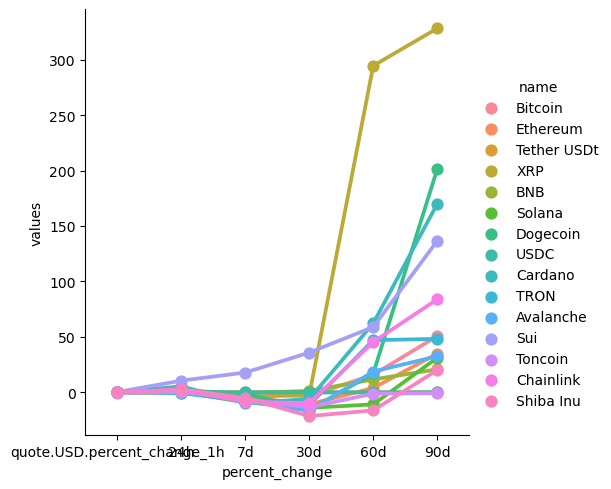

In [40]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [49]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10=df10.iloc[1:]
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,95042.52165,2025-01-10 16:40:00.150782
0,Bitcoin,95042.52165,2025-01-10 16:41:01.359287
0,Bitcoin,95002.74067,2025-01-10 16:44:01.923209
0,Bitcoin,94966.96342,2025-01-10 16:45:04.906016
0,Bitcoin,94960.72994,2025-01-10 16:46:06.918489
0,Bitcoin,94960.72994,2025-01-10 16:47:10.410443
0,Bitcoin,94980.45560,2025-01-10 16:48:12.591484


In [50]:
sns.set_theme(style="darkgrid")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

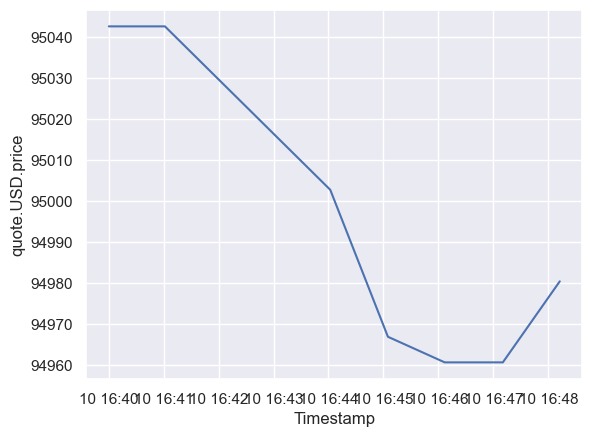

In [51]:
sns.lineplot(x='Timestamp', y='quote.USD.price', data = df10)